# Scikit-Transformers : LogColumnTransformer

## Imports 

Import warnings and disable warnings for this notebook.

In [1]:
import warnings

warnings.filterwarnings("ignore")

Import the data libraries

In [2]:
import pandas as pd
import numpy as np

Import visualisation libraries

In [3]:
import seaborn as sns

Uncomment the following cell to install the necessary packages.

In [4]:
#!pip install scikit-transformers

Import scikit-transformers

In [5]:
try:
    from sktransf.utils import get_titanics
except Exception as e:
    print(e)
    print("Please install thea package using the following command")
    print("pip install scikit-transformers")
    from sktransf.utils import get_titanic

cannot import name 'get_titanics' from 'sktransf.utils' (/home/alex/tmp/scikit-transformers/sktransf/utils/__init__.py)
Please install thea package using the following command
pip install scikit-transformers


In [6]:
from sktransf.transformer import LogColumnTransformer

## Data

Get the data from the [Kaggle](https://www.kaggle.com/c/titanic/data) Titanic dataset.

In [7]:
df, _ = get_titanic()

Display the first few rows of the data.

In [8]:
df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


Display the new df

In [9]:
df.sample(10)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
359,360,3,NaN,0,0,7.8792
378,379,3,20.0,0,0,4.0125
653,654,3,NaN,0,0,7.8292
848,849,2,28.0,0,1,33.0000
715,716,3,19.0,0,0,7.6500
622,623,3,20.0,1,1,15.7417
734,735,2,23.0,0,0,13.0000
366,367,1,60.0,1,0,75.2500
778,779,3,NaN,0,0,7.7375
862,863,1,48.0,0,0,25.9292


## Using LogColumnTransformer

Checking the Fare column

In [10]:
df.Fare.describe().astype(int)

count    891
mean      32
std       49
min        0
25%        7
50%       14
75%       31
max      512
Name: Fare, dtype: int64

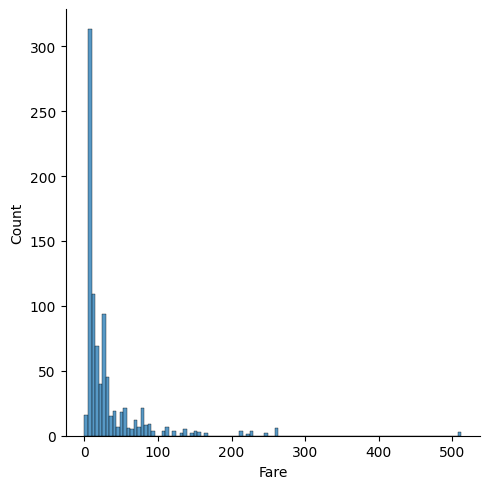

In [11]:
sns.displot(df.Fare)

Fit and transform the data using the LogColumnTransformer

In [12]:
clean_df = LogColumnTransformer(force_df_out=True).fit_transform(df)
clean_df

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,0.693147,0,2.110213
1,2,1,38.0,0.693147,0,4.280593
2,3,3,26.0,0.000000,0,2.188856
3,4,1,35.0,0.693147,0,3.990834
4,5,3,35.0,0.000000,0,2.202765
...,...,...,...,...,...,...
886,887,2,27.0,0.000000,0,2.639057
887,888,1,19.0,0.000000,0,3.433987
888,889,3,NaN,0.693147,2,3.196630
889,890,1,26.0,0.000000,0,3.433987


Checking the new Fare column

In [13]:
clean_df.Fare.describe().astype(int)

count    891
mean       2
std        0
min        0
25%        2
50%        2
75%        3
max        6
Name: Fare, dtype: int64

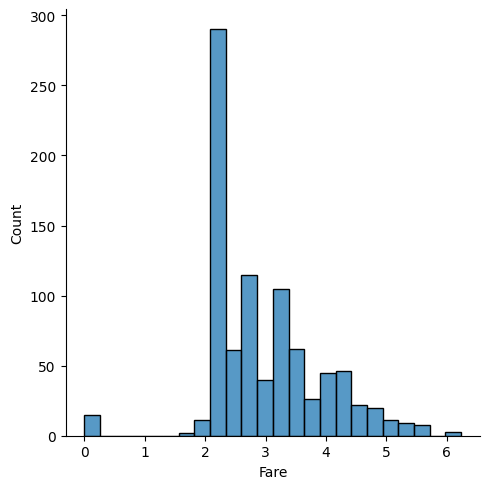

In [14]:
sns.displot(clean_df.Fare)

## Playing with threshold 

Using the threshold parameter at 0.00

In [15]:
_df = LogColumnTransformer(force_df_out=True, threshold=0.00).fit_transform(df)
_df.round(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0.69,3,3.14,0.69,0.0,2.11
1,1.10,1,3.66,0.69,0.0,4.28
2,1.39,3,3.30,0.00,0.0,2.19
3,1.61,1,3.58,0.69,0.0,3.99
4,1.79,3,3.58,0.00,0.0,2.20
...,...,...,...,...,...,...
886,6.79,2,3.33,0.00,0.0,2.64
887,6.79,1,3.00,0.00,0.0,3.43
888,6.79,3,NaN,0.69,1.1,3.20
889,6.79,1,3.30,0.00,0.0,3.43


All columns are transformed

Using the threshold parameter at 10.0

In [16]:
_df = LogColumnTransformer(force_df_out=True, threshold=10.0).fit_transform(df)
_df.round(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.25
1,2,1,38.0,1,0,71.28
2,3,3,26.0,0,0,7.92
3,4,1,35.0,1,0,53.10
4,5,3,35.0,0,0,8.05
...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.00
887,888,1,19.0,0,0,30.00
888,889,3,NaN,1,2,23.45
889,890,1,26.0,0,0,30.00


No columns are transformed